<a href="https://colab.research.google.com/github/pyhtonman0101/Global-Terrorism-Analysis/blob/main/Zahid_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

**Characteristics of the Database**
*   Contains information on over 180,000 terrorist attacks
*   Currently the most comprehensive unclassified database on terrorist attacks in the world
*   Includes information on at least 45 variables for each case, with more recent incidents including information on 135  variables

**Project Goals**


*   Read the source and do some quick research to understand more about the dataset and its topic
*   Clean the data
*   Perform some Preprocessing to get the field that needs to be given the prime focus
*   Perform Exploratory Data Analysis on the dataset
*   Analyze the data more deeply and extract insights



#Feature Explanation:

* Eventid : Unique Id assigned to a terrorist attack.
* Year : Year of the attack
* Month : Month of the attack.
* Day : Day of the attack.
* Country : Country in which attack took place.
* Region : Region in which attack took place.
* Latitude : Latitude co-ordinate w.r.t to world map.
* Longitude : Longitude co-ordinate w.r.t to world map.
* Attack : Type of attack.
* Target : Targeted facility of the attack.
* Killed : Number of people killed in this attack.
* Wounded : Number of people wounded in this attack.
* Summary : Attack description in short.
* Groupname : Terrorist Group name.
* Target_type : Name of the Specific entity suffered by the attack.
* Weapon_type : Weapon type used by the terrorists.
* Motive : Reason behind the attack.
* Damages : Damages incurred in dollars($).
* Damage_txt : Scale of damage done(Minor, Major, Catastrophic)
* Suicide : Suicide number of terrorists.
* City : City in which attack took place.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from PIL import Image

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Module 1/Capstone Project 1/Global Terrorism Data.csv'
df = pd.read_csv(file_path, encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

##Data Processing and cleaning
###Raw data is often unorecognized and contains a lot of information which is irrelevant to the project requirements. Data preprocessing methodology helps in converting this raw data into a more    meaningful, focused, interpretable and readable format. 

In [6]:
#Rename and extract useful columns for better understanding before getting in dataframe.
df.rename(columns ={'iyear':'Year', 'imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'Attack Type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group_name','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'}, inplace = True)

In [9]:
#Make a new dataframe with useful features only.
gt_df = df[['Year','Month','Day','Country','Region','city', 'latitude', 'longitude','Attack Type','Target','Killed','Wounded','Summary','Group_name','Target_type','Weapon_type','Motive']]

In [10]:
gt_df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,Attack Type,Target,Killed,Wounded,Summary,Group_name,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [11]:
gt_df.tail()

,Year,Month,Day,Country,Region,city,latitude,longitude,Attack Type,Target,Killed,Wounded,Summary,Group_name,Target_type,Weapon_type,Motive
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,Checkpoint,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,Hmeymim Air Base,2.0,7.0,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,Houses,0.0,0.0,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,Office,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN
181690,2017,12,31,Philippines,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,Unknown,0.0,0.0,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN


In [12]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   Attack Type  181691 non-null  object 
 9   Target       181055 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Summary      115562 non-null  object 
 13  Group_name   181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


**Cleaning:**
We clean data only on those columns and rows in which we are going to work. So we will clean data with each topic's visualizations below.


# 1. Number Of Attacks from 1970 to 2017 By Terrorists

In [13]:
# Check is there any null or Nan values in the column of "Year".
gt_df['Year'].isnull().unique()
# So There is no null values so no need to clean Year Column.

array([False])

In [14]:
# Let's create dataframe of number of attack each year group by 'Year' Column
number_of_attack_each_year = gt_df.groupby(['Year'])['Year'].count()

Text(0, 0.5, 'Number Of Attacks')

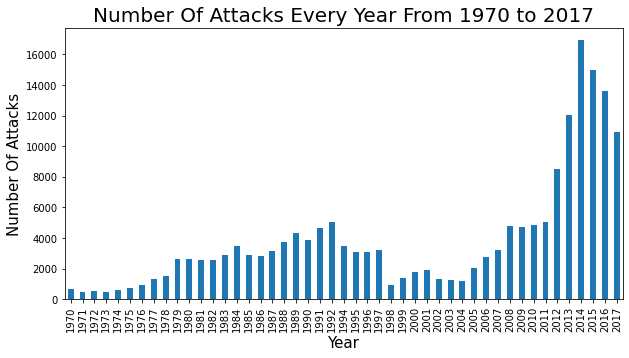

In [15]:
# Visualize the number of attacks each year with bar plot
plt.rcParams['figure.figsize'] = (10,5)
number_of_attack_each_year.plot(kind = 'bar')
plt.title('Number Of Attacks Every Year From 1970 to 2017', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number Of Attacks', fontsize = 15)

#Inference:
From above bar chart of Number Of Attack Every Year From 1970 to 2017, we can analyse that terror attacks were increasing from 2011 to 2013 and peak at 2013. After 2014 terror attacks decreased.

# Number Of Attacks Every Year By Top 10 Active Terrorist Group

In [16]:
# Filter top 10 terrorist group in Dataframe.
attack_by_grp=gt_df['Group_name'].value_counts()
top_attack_group = attack_by_grp[1:11]  # start indexing from 1 because at zeroth indexing there are unknown terrorist groups
grp_name = top_attack_group.index
top_attack_grp = gt_df[gt_df['Group_name'].isin(grp_name)]

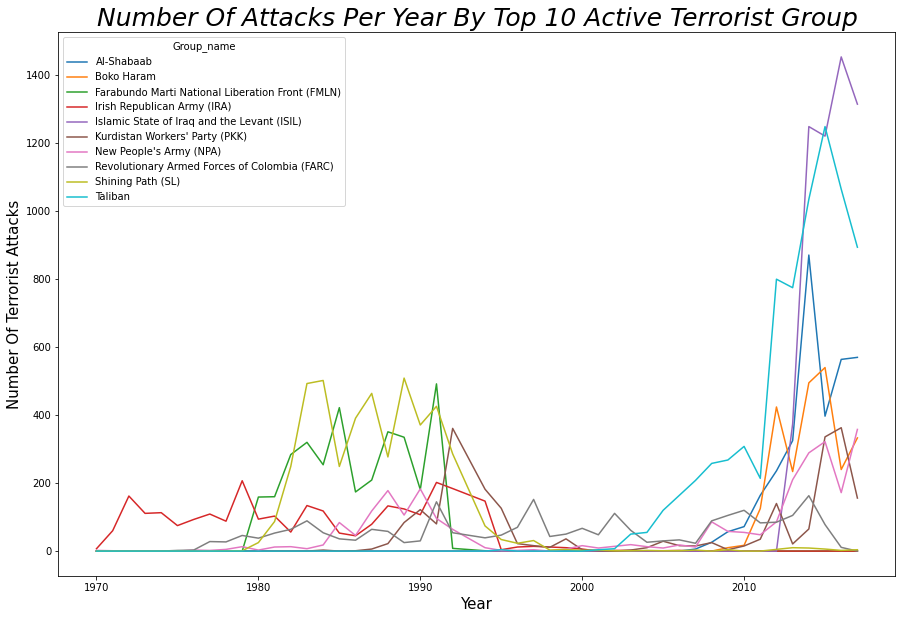

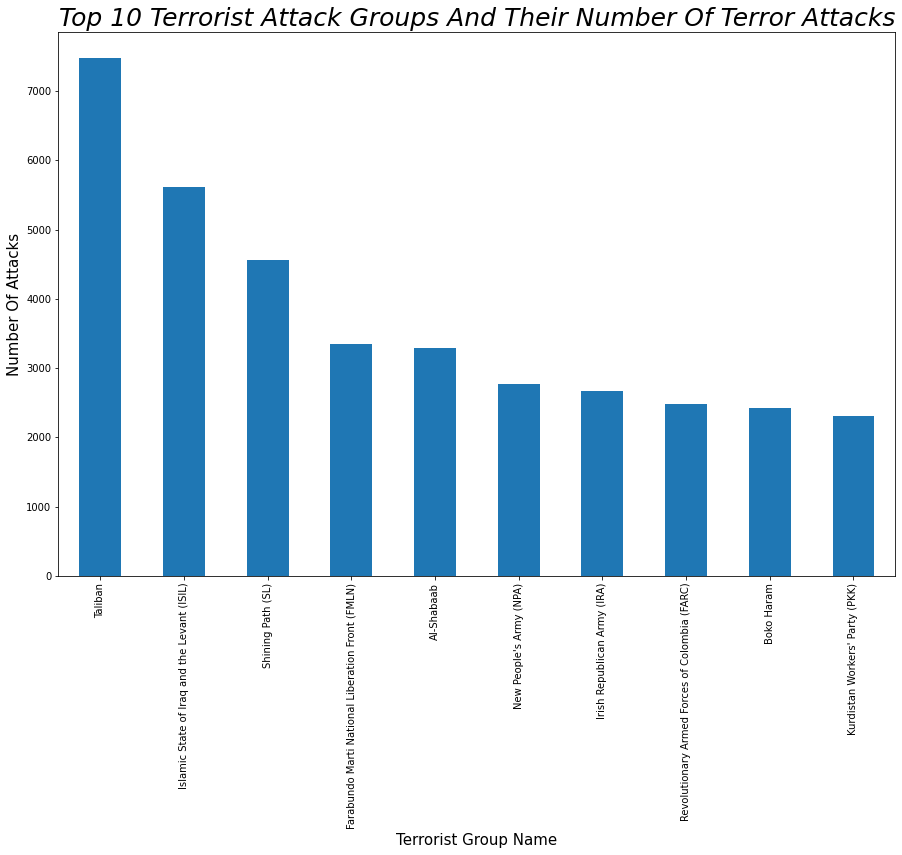

In [17]:
# Make another Dataframe named tag_df with two columns, Year and number of attacks by top 10 groups and unstack it.
tag_df = top_attack_grp.groupby(['Year', 'Group_name'])['Group_name'].count().unstack()
tag_df.fillna(0, inplace = True)

# Plot a line graph between years and number of terrorist attacks by top 10 terrorist group
plt.rcParams['figure.figsize'] = (15,10)
tag_df.plot(kind = 'line')
plt.title('Number Of Attacks Per Year By Top 10 Active Terrorist Group', fontsize=25, Style='oblique')
plt.ylabel('Number Of Terrorist Attacks',fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.show()

# Bar plot of top 10 terrorist attack groups Vs number of terror attacks
plt.rcParams['figure.figsize'] = (15,10)
top_attack_group.plot(kind = 'bar')
plt.title('Top 10 Terrorist Attack Groups And Their Number Of Terror Attacks', fontsize=25, Style= 'oblique')
plt.xlabel('Terrorist Group Name', fontsize=15)
plt.ylabel('Number Of Attacks', fontsize=15)
plt.show()

#Inference:
From above line chart we can see the number of terror attacks by top 10 terrorist groups from 1970 to 2017. 

Here we can see how Taliban rapidly grow in terror activities from 2003 to 2017.

Shining path terrorist group started their terror activities from 1979 and had been worked since 1995. After that thier activities are not that much.

# **Number Of Attacks Per Weapon**

In [18]:
# Check is there any null values in 'Weapon Type' column
gt_df['Weapon_type'].isnull().unique()


array([False])

In [19]:
# There is no null values. Now check unique values so that we can check there is any unneccery values to drop or not
gt_df['Weapon_type'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [20]:
# We have to remove Unknown values in Weapon_type column
gt_df.drop(gt_df.index[gt_df['Weapon_type'] == 'Unknown'], inplace=True)
gt_df.drop(gt_df.index[gt_df['Weapon_type'] == 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
# Check we have succefully remove unknown values or not.
(gt_df['Weapon_type']=='Unknown').unique()

array([False])

In [22]:
weapon_df = gt_df.groupby(['Weapon_type'])['Weapon_type'].count()
# weapon_df.drop(weapon_df.index[gt_df['Weapon_type'] == 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'], inplace=True)
weapon_df

Weapon_type
Biological               35
Chemical                321
Explosives            92426
Fake Weapons             33
Firearms              58524
Incendiary            11135
Melee                  3655
Other                   114
Radiological             14
Sabotage Equipment      141
Name: Weapon_type, dtype: int64

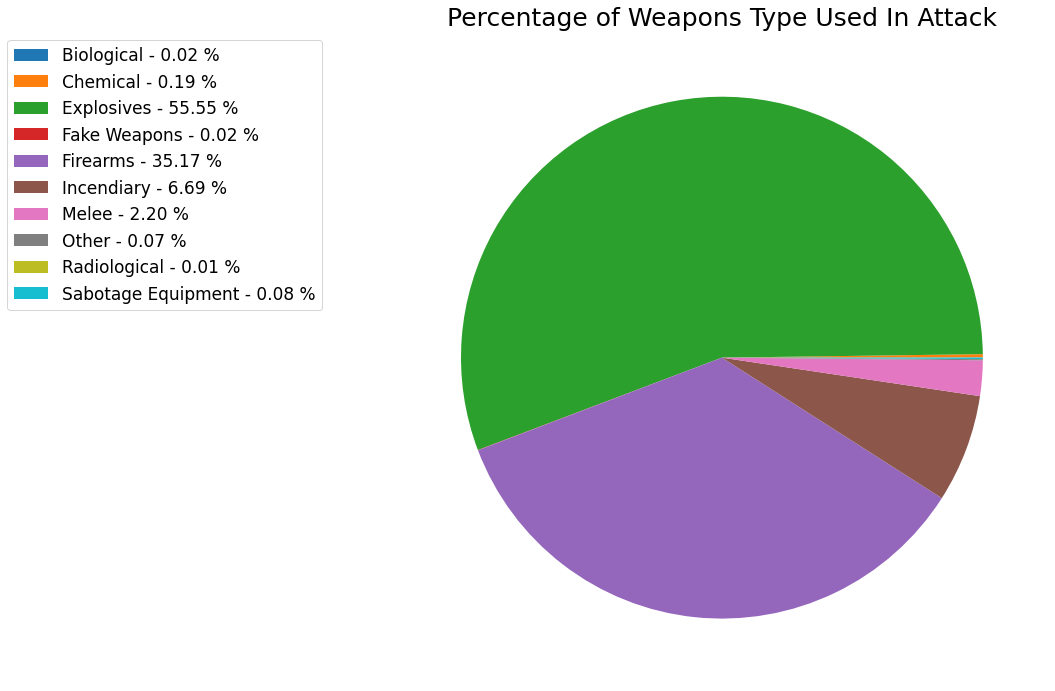

In [23]:
# Draw pie chart for 
plt.figure(figsize=(15,12))
data = weapon_df
label = weapon_df.index
percent = 100.*data/data.sum()
plt.pie(data)

#Making customized legend by editing labels
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(label, percent)]
plt.legend(labels, bbox_to_anchor=(-0.1,1), fontsize=17)
plt.title('Percentage of Weapons Type Used In Attack', fontsize = 25)
plt.show()

#Inference:
From above pie chart we can see that terrorists mostly use explosive, firearms and incendiary weapon type.

# Highest Terrorist Attack Cities In India

In [24]:
# find there is any null or Unknown values
print(gt_df['Country'].isnull().unique())
(gt_df['Country'] == 'Unknown').unique()

[False]


array([False])

In [25]:
# Make dataframe of India country
India_df = gt_df[gt_df['Country'] == 'India']
India_df['city']

1186          New Delhi
2764         Samastipur
3857          New Delhi
5327             Bombay
7337            Unknown
              ...      
181663    Koothuparamba
181665         Toylanka
181672        Lethapora
181684          Hungrum
181689           Imphal
Name: city, Length: 11045, dtype: object

In [26]:
# find there is any null values in city column
(India_df['city']).isnull().unique()

array([False])

In [27]:
# Drop unknown values from the Indian city column 
India_df.drop(India_df.index[India_df['city'] == 'Unknown'], inplace=True)

# Create Word cloud for Most affacted Indian Cities 

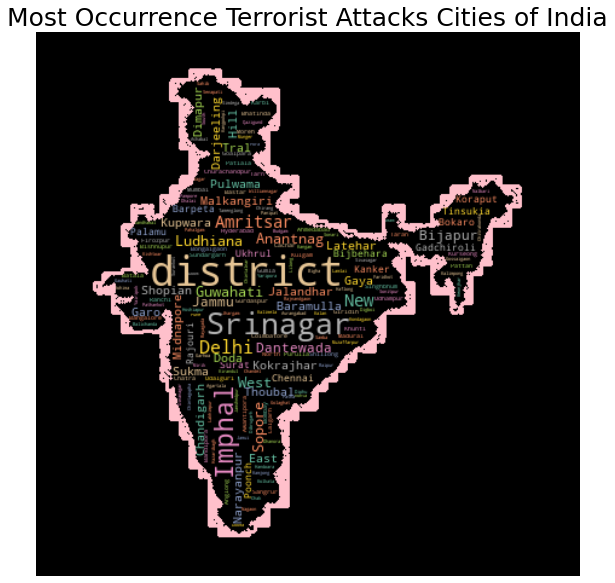

In [28]:
#Creating the text variable
text = India_df['city']
text = text.to_string()
text = re.sub(' +',' ',text)
mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/Module 1/Capstone Project 1/india map.png"))
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'black', max_words=1000, mask=mask,contour_color='#FFC0CB',contour_width=2,colormap='Set2').generate(text)
plt.figure()
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("cloud.png", format="png")
plt.margins(x=0,y=0)
plt.title('Most Occurrence Terrorist Attacks Cities of India', fontsize = 25)
plt.show()

#Inference:
from this word cloud of highly attacked cities of India we can infer that Srinagar, Imphal, Amristsar etc. are highly attacked cities of India those are in North India. So terrorists mostly attacks in the north side of India.

# Most Active Terrorist Groups In India

In [29]:
# Remove unknown values from Group_name
India_df.drop(India_df.index[India_df['Group_name'] == 'Unknown'], inplace=True)
(India_df['Group_name']=='Unknwon').unique()

array([False])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


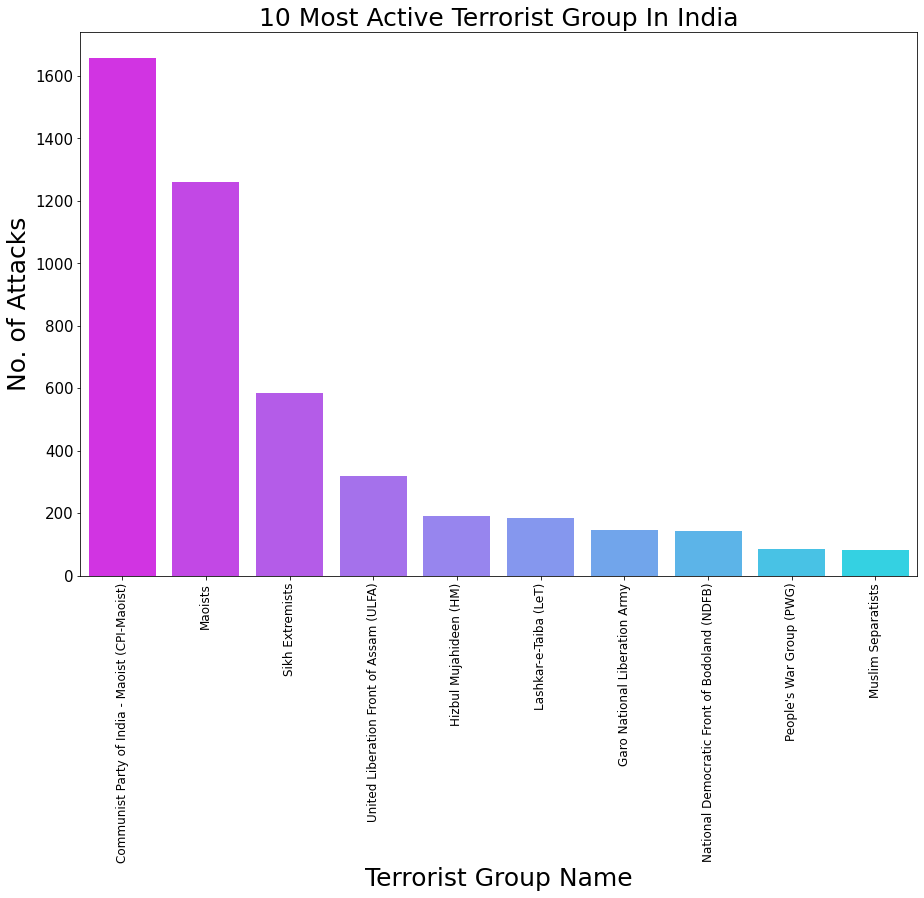

In [30]:
india_active_grp = India_df['Group_name'].value_counts()
a = india_active_grp[:10]
sns.barplot(a.index,a.values,palette ='cool_r')
plt.xticks(fontsize = 12, rotation=90)
plt.yticks(fontsize=15)
plt.title('10 Most Active Terrorist Group In India',fontsize = 25)
plt.xlabel('Terrorist Group Name',fontsize = 25)
plt.ylabel('No. of Attacks',fontsize = 25)
plt.show()

#Inference:
From above bar plot of "10 Most Active Terrorist Groups In India", we can infer that CPI-Maoist is highly active terrorist group in India